In [8]:
import cv2
import os

data_path=r"C:\Users\RAHUL\Downloads\plantvillage"
categories=os.listdir(data_path) 
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'Tomato_Bacterial_spot': 0, 'Tomato_Early_blight': 1, 'Tomato_healthy': 2, 'Tomato_Late_blight': 3, 'Tomato_Leaf_Mold': 4, 'Tomato_Septoria_leaf_spot': 5, 'Tomato_Spider_mites_Two_spotted_spider_mite': 6, 'Tomato__Target_Spot': 7, 'Tomato__Tomato_mosaic_virus': 8, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 9, 'Tomato___Bacterial_spot': 10, 'Tomato___Early_blight': 11, 'Tomato___healthy': 12, 'Tomato___Late_blight': 13, 'Tomato___Leaf_Mold': 14, 'Tomato___Septoria_leaf_spot': 15, 'Tomato___Spider_mites Two-spotted_spider_mite': 16, 'Tomato___Target_Spot': 17, 'Tomato___Tomato_mosaic_virus': 18, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 19}
['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'T

In [9]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])

        except Exception as e:
            print('Exception:',e)

Exception: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [10]:
import numpy as np

data=np.array(data)/255.0
print(data.shape)
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)
print(new_target)

(30540, 100, 100)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [11]:
np.save('data',data)
np.save('target',new_target)

In [12]:

data=np.load('data.npy')
target=np.load('target.npy')

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [14]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='softmax'))

In [15]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [16]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [24]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
688/688 [==============================] - 981s 1s/step - loss: 2.1956 - accuracy: 0.2557 - val_loss: 1.7282 - val_accuracy: 0.3425
Epoch 2/20
688/688 [==============================] - 961s 1s/step - loss: 1.6009 - accuracy: 0.3640 - val_loss: 1.4295 - val_accuracy: 0.3749
Epoch 3/20
688/688 [==============================] - 954s 1s/step - loss: 1.3952 - accuracy: 0.4015 - val_loss: 1.3617 - val_accuracy: 0.4034
Epoch 4/20
688/688 [==============================] - 963s 1s/step - loss: 1.2673 - accuracy: 0.4299 - val_loss: 1.2532 - val_accuracy: 0.4014
Epoch 5/20
688/688 [==============================] - 73938s 108s/step - loss: 1.1810 - accuracy: 0.4490 - val_loss: 1.2383 - val_accuracy: 0.4051
Epoch 6/20
688/688 [==============================] - 1060s 2s/step - loss: 1.1162 - accuracy: 0.4568 - val_loss: 1.1364 - val_accuracy: 0.4123
Epoch 7/20
688/688 [==============================] - 1722s 3s/step - loss: 1.0657 - accuracy: 0.4703 - val_loss: 1.2422 - val_accuracy: 

In [17]:
model.save('PDD.h5')

In [18]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [19]:
new_model = tf.keras.models.load_model('PDD.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       2000      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                    

17
[0.04856309 0.04783914 0.04947099 0.04973384 0.05401479 0.05021726
 0.05285815 0.04631032 0.04662419 0.04868912 0.04837111 0.04932623
 0.05343339 0.05057014 0.05491986 0.0507582  0.04783204 0.05523792
 0.04879812 0.04643208]
Tomato___Target_Spot


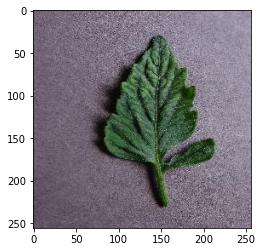

In [20]:
h, w = 100, 100

img = image.load_img(r"C:\Users\RAHUL\Downloads\plantvillage\Tomato__Tomato_mosaic_virus\faaab5c4-517e-4417-b471-fa1d762e35c4___PSU_CG 2173.JPG", target_size=(100,100,1))
imge = cv2.imread(r"C:\Users\RAHUL\Downloads\plantvillage\Tomato__Tomato_mosaic_virus\faaab5c4-517e-4417-b471-fa1d762e35c4___PSU_CG 2173.JPG")
gray=cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)
out = np.expand_dims(gray,axis=0)
final_img = out/255.0

pred = model.predict(final_img)
max_index=np.argmax(pred[0])
print(max_index)
emotions= ('Tomato Bacterial spot', 'Tomato Early blight', 'Tomato healthy', 'Tomato Late blight', 'Tomato Leaf Mold', 'Tomato Septoria leaf spot', 'Tomato_Spider mites Two spotted spider mite', 'Tomato Target Spot', 'Tomato Tomato mosaic virus', 'Tomato Tomato YellowLeaf Curl Virus', 'Tomato Bacterial spot', 'Tomato Early blight', 'Tomato healthy', 'Tomato Late blight', 'Tomato Leaf Mold', 'Tomato Septoria leaf spot', 'Tomato Spider mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato mosaic virus', 'Tomato Tomato_Yellow_Leaf_Curl_Virus')
print(pred[0])
predicted_emotion=emotions[max_index]
print(predicted_emotion)

plt.imshow(cv2.cvtColor(imge, cv2.COLOR_BGR2RGB))
plt.show()

12
[0.04888488 0.04745499 0.04941187 0.04985263 0.05370069 0.04990304
 0.05308206 0.0473518  0.04671597 0.04873177 0.0485994  0.04977168
 0.05431331 0.05022786 0.05395893 0.05064939 0.04820695 0.05421472
 0.04878565 0.04618242]
Tomato___healthy


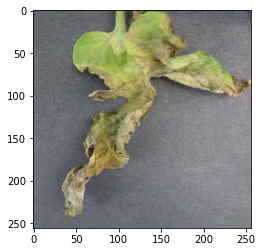

In [21]:
img = image.load_img(r"C:\Users\RAHUL\Downloads\plantvillage\Tomato_Late_blight\fc0cec90-4a1e-4cdc-95cf-a34abc1dc8c9___GHLB2 Leaf 117.2.JPG", target_size=(100,100,1))
imge = cv2.imread(r"C:\Users\RAHUL\Downloads\plantvillage\Tomato_Late_blight\fc0cec90-4a1e-4cdc-95cf-a34abc1dc8c9___GHLB2 Leaf 117.2.JPG"
)
gray=cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)
out = np.expand_dims(gray,axis=0)
final_img = out/255.0

pred = model.predict(final_img)
max_index=np.argmax(pred[0])
print(max_index)
emotions= ('Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus')
print(pred[0])
predicted_emotion=emotions[max_index]
print(predicted_emotion)

plt.imshow(cv2.cvtColor(imge, cv2.COLOR_BGR2RGB))
plt.show()